In [1]:
%load_ext autoreload
import GCMPy as gp
%aimport GCMPy
%autoreload 1
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns
sns.set(style='ticks', context='paper')
colors=["#e3c934","#68c4bf","#c51000","#287271"]
sns.set_palette(colors)

## Import Peterson & Barney 1952 as pb52, convert to Bark

In [2]:
pb52=pd.read_csv('pb52.csv')
pbbark = gp.HzToBark(pb52,["F0","F1","F2","F3"])
pbbark.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
1439,c,m,72,NURSE,2,250,480,1700,1830,2.502805,4.744098,11.922732,12.415198
784,w,f,40,DRESS,1,210,528,2540,3170,2.064516,5.159582,14.602756,16.036803
924,w,f,47,DRESS,1,173,550,2370,3140,1.644463,5.344701,14.144296,15.976549
856,w,f,43,GOOSE,1,250,450,875,2750,2.502805,4.476017,7.744691,15.123397
571,m,m,29,PALM,2,114,750,1175,2820,0.943645,6.889742,9.518405,15.286778


## Set some parameters

In [3]:
# set c, the sensitivity of exemplar cloud
cval=25

# set dimesnsions m as keys, 
    ## set weight of each dimension w_m as values
dimsvals={'z0':1,'z1':.761,'z2':.681,'z3':.407}
dimslist = list(dimsvals.keys())

# set categories to be considered as items in a list
catslist=['vowel','type']

# set the test set to be a copy of the exemplar cloud
test = pbbark.copy()

## Categorize exemplar cloud

In [4]:
choices = gp.multicat(test,pbbark,catslist,dimsvals,cval,exclude_self=True, N=1)

### Generate confusion matrix

In [4]:
gp.confusion(choices,["vowel"])

NameError: name 'choices' is not defined

# Once more, with priming

1. Generate continuum of average values
2. Categorize with no bias
3. Categorize with bias
4. Plot both

In [147]:
datasumm = gp.datasummary(pbbark,catslist,dimslist)
start = {"type":"w","vowel":"GOOSE"}
end = {"type":"w","vowel":"FOOT"}
typebias = {"m":1,"w":1,"c":100}

In [143]:
kit2dress = gp.continuum(datasumm, end, start, dimslist, steps=7)
nobias = gp.multicat(kit2dress,pbbark,catslist,dimsvals,cval, exclude_self=True)
bias = gp.multicatprime(kit2dress,pbbark,catslist,dimsvals,cval,cat="type",catbias=typebias, exclude_self=True)

In [149]:
bias

,z0,z1,z2,z3,vowelChoice,vowelProb,typeChoice,typeProb,yax
0,2.323410,4.636707,9.405672,14.947067,FOOT,0.903071,w,0.596752,0.903071
1,2.325088,4.496287,9.209181,14.939151,FOOT,0.714334,w,0.703665,0.714334
2,2.326767,4.355867,9.012691,14.931234,FOOT,0.609312,w,0.800012,0.609312
3,2.328445,4.215447,8.816201,14.923318,FOOT,0.626010,w,0.863245,0.626010
4,2.330123,4.075027,8.619711,14.915402,FOOT,0.539290,w,0.882967,0.539290
5,2.331801,3.934608,8.423221,14.907485,GOOSE,0.669698,w,0.828875,0.330302
6,2.333479,3.794188,8.226731,14.899569,GOOSE,0.802725,w,0.710628,0.197275


In [150]:
nobias

,z0,z1,z2,z3,vowelChoice,vowelProb,typeChoice,typeProb,yax
0,2.323410,4.636707,9.405672,14.947067,FOOT,0.924998,w,0.930296,0.924998
1,2.325088,4.496287,9.209181,14.939151,FOOT,0.776275,w,0.948896,0.776275
2,2.326767,4.355867,9.012691,14.931234,FOOT,0.699305,w,0.965887,0.699305
3,2.328445,4.215447,8.816201,14.923318,FOOT,0.700043,w,0.974938,0.700043
4,2.330123,4.075027,8.619711,14.915402,FOOT,0.592776,w,0.973596,0.592776
5,2.331801,3.934608,8.423221,14.907485,GOOSE,0.619065,w,0.964776,0.380935
6,2.333479,3.794188,8.226731,14.899569,GOOSE,0.737171,w,0.951055,0.262829


## Set the category bias
Make "m" exemplars twice as highly activated as "w" and "c" exemplars

NOTE: In the current implementation, we will now need to use the function multicatprime(). multicatprime() is identical to multicat with the exception that it uses bias_N() (setting *N* based on category membership) rather than reset_N() (setting *N* uniformally). I've given the two additional arguments, 'cat' and 'catbias' with as keyword, rather than positional arguments, to help emphasize the difference.

In [109]:
typebias = {"m":1,"w":200,"c":1}

In [7]:
choices_priming = gp.multicatprime(test,pbbark,catslist,dimsvals,cval,cat="type",catbias=typebias,exclude_self=True)

In [7]:
datasumm = gp.datasummary(pbbark,catslist,dimslist)
start = {"type":"w","vowel":"KIT"}
end = {"type":"w","vowel":"DRESS"}

In [103]:
kit2dress = gp.continuum(datasumm, end, start, dimslist, steps=7)

In [104]:
kit2dress

,z0,z1,z2,z3
0,2.306120,4.386027,14.414048,15.809872
1,2.284039,4.621889,14.349853,15.787273
2,2.261957,4.857751,14.285659,15.764673
3,2.239876,5.093613,14.221464,15.742073
4,2.217794,5.329475,14.157270,15.719474
5,2.195712,5.565337,14.093075,15.696874
6,2.173631,5.801199,14.028881,15.674275


In [112]:
choices_k2d = gp.multicatprime(kit2dress,pbbark,catslist,dimsvals,cval,cat="type",catbias=typebias, exclude_self=True)

In [113]:
m = choices_k2d

In [107]:
def cpplot(data,cat):
    choicename = cat+'Choice'
    probname = cat+'Prob'
    stv = data.loc[0][choicename]
    
    def copy(d):
        d = d
        return d

    def inv(d):
        d = 1-d
        return d
    
    data['yax'] = data.apply(lambda x: copy(x[probname]) if x[choicename]==stv else inv(x[probname]),axis=1)
    
    axisname = "Proportion " + stv + " Response"
    p = sns.lineplot(x=(data.index.values)+1, y="yax", data=data)
    p.set_ylabel(axisname)
    p.set_xlabel("Step")
    
    

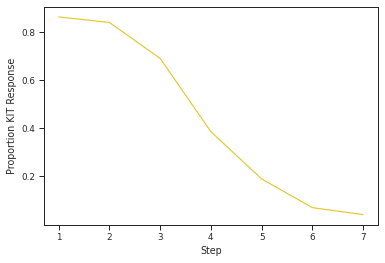

In [114]:
cpplot(m,"vowel")